# e1_compute_occurence_entities
From the file list_meetings.csv, find the number of invertions of each entitx for each issues. Return a file named occurences.csv with the collected informations

In [1]:
import urllib.request
import requests
import re
from bs4 import BeautifulSoup
from dateutil.parser import parse
import csv
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.tokenize import MWETokenizer
import import_ipynb
import c1_extract_paragraphe_issue as c1 
import c2_extract_sentence_issue as c2 


importing Jupyter notebook from c1_extract_paragraphe_issue.ipynb
Issue  34
importing Jupyter notebook from c2_extract_sentence_issue.ipynb


In [2]:
def open_list_meetings():
    """ Open the csv file that contain all the meetings. """
    f = open('list_meetings.csv')
    return csv.reader(f)

In [3]:
def write_occurrence_issue(occurences_meetings, s):
        with open(s, "w", newline='') as file:
                writer = csv.writer(file)
        #header
                writer.writerow(('entity','interventions'))
                writer.writerows(occurences_meetings)

In [4]:
def extract_tuple(line):
    """ Extract tuple for each row from Paula's dataset. """
    l = line.replace('"',"")
    l = l.replace('\n',"")
    l = l.split('\t')
    return l

In [5]:
def clean_tp(sentence):
    """ Clean the sentence by removing special char. """
    s = sentence.replace("\r\n\s\s+"," ")
    s = s.replace("\r\n"," ")
    s = s.replace("\s\s+"," ")
    s = s.replace("\\."," ")
    s = s.replace("\\r\\n"," ")
    p = re.compile(r'<.*?>')
    return p.sub('', s)


In [6]:
def count_occurences(list_sentences, dict_occ, tokenizer1, tokenizer2, tokenizer3, list_entities, number):
    """ Count number of time each entity in list_entities is mentioned in list_sentences. """

    for s in list_sentences:
        #Split line into words with tokenizer to detetc entity
        line = s.replace(",","")
        line_splited = word_tokenize(line)
        tokens = tokenizer1.tokenize(line_splited) 
        tokens = tokenizer2.tokenize(tokens) 
        tokens = tokenizer3.tokenize(tokens) 
        tokens = [clean_tp(token) for token in tokens]
        tokens_c = []
        for i in range(len(tokens)-1):
            if(tokens[i+1] !='.'):
                tokens_c.append(tokens[i])

        for entity in list_entities:
            #Increment value of intervention of the entity
            if(entity in tokens_c):
                dict_occ[entity] += tokens_c.count(entity)               
    rows = [(number, entity, dict_occ[entity]) for entity in dict_occ]
    return rows

In [7]:
def extract_occurences_issue_ENB(list_sentences, number):
    """ Extract all the occurences for each entities for a specific issue. """
    #List sentences
    sentences = list_tp = list_sentences

    # Extract list entities
    list_entities = [s.replace('\n','') for s in list(open('entities_clean.txt'))]
    list_entities = [s.replace(',','') for s in list_entities]
    list_entities = [s.replace(':','') for s in list_entities]
    
    tokens_entities = [l.split(' ') for l in list_entities]

    tokenizer1 = MWETokenizer(tokens_entities, separator=' ')
    tokenizer2 = MWETokenizer([['G-77','CHINA']], separator='/')
    tokenizer3 = MWETokenizer([['G-77/',' CHINA']], separator=' ')

    occurences_meetings = []

    dict_occurences = dict.fromkeys(list_entities, 0)
    occurences_meetings = count_occurences(sentences, dict_occurences, tokenizer1,tokenizer2,tokenizer3, list_entities, number)
    return occurences_meetings

In [31]:
#Occurence for a specific meeting
p = c1.extract_paragraphes_from_issue(657)
s = c2.extract_from_txt_sentences(p)
extract_occurences_issue_ENB(s, 657)

https://enb.iisd.org/vol12/enb12657e.html
Issue  657


[(657, 'ABU', 0),
 (657, '', 0),
 (657, 'AFGHANISTAN', 0),
 (657, 'AFRICA GROUP', 0),
 (657, 'AFRICAN GROUP', 3),
 (657, 'AILAC', 2),
 (657, 'ALBA', 0),
 (657, 'for LDCs', 0),
 (657, 'ALBANIA', 0),
 (657, 'for the Group of 77 and China', 0),
 (657, 'ALLIANCE OF SMALL ISLAND STATES', 0),
 (657, 'ALBANIA AND MOLDOVA GROUP', 0),
 (657, 'ALGERIA', 0),
 (657, 'ANGOLA', 0),
 (657, 'ANTIGUA AND BARBUDA', 0),
 (657, 'ANTINGUA AND BARBUDA', 0),
 (657, 'AOSIS', 4),
 (657, 'APEC', 0),
 (657, 'ARAB EMIRATES', 0),
 (657, 'ARAB STATES', 0),
 (657, 'ARAB GROUP', 0),
 (657, 'ARABIAN COUNTRIES GROUP', 0),
 (657, 'ARGENTINA', 0),
 (657, 'ARMENIA', 0),
 (657, 'AUSTRALIA', 1),
 (657, 'AUSTRIA', 0),
 (657, 'AZERBAIJAN', 0),
 (657, 'BAHAMAS', 0),
 (657, 'BAHRAIN', 0),
 (657, 'BANGLADESH', 0),
 (657, 'BARBADOS', 0),
 (657, 'BARBUDA', 0),
 (657, 'BASIC', 0),
 (657, 'BELARUS', 0),
 (657, 'BELGIUM', 0),
 (657, 'BELGUIM', 0),
 (657, 'BELIZE', 0),
 (657, 'BENIN', 0),
 (657, 'BHUTAN', 0),
 (657, 'BINGOS', 0),
 (65

In [9]:
import csv
def open_list_meetings():
    """ Open the csv file that contain all the meetings. """
    f = open('list_meetings.csv')
    return csv.reader(f)

In [10]:
def extract_cop():
    list_cop_issues = [int(i[4]) for i in open_list_meetings() if i[0] == 'COP'and int(i[4]) > 22]
    occurences_cops = []
    for c in list_cop_issues:
        p = c1.extract_paragraphes_from_issue(c)
        s = c2.extract_from_txt_sentences(p)
        occurences_cops += extract_occurences_issue_ENB(s,c)
    return occurences_cops

In [11]:
occurences_cops = extract_cop()

Issue  28
Issue  29
Issue  30
Issue  31
Issue  32
Issue  33
Issue  34
Issue  35
Issue  36
Issue  37
Issue  38
https://enb.iisd.org/vol12/enb1267e.html
Issue  67
https://enb.iisd.org/vol12/enb1268e.html
Issue  68
https://enb.iisd.org/vol12/enb1269e.html
Issue  69
https://enb.iisd.org/vol12/enb1270e.html
Issue  70
https://enb.iisd.org/vol12/enb1271e.html
Issue  71
https://enb.iisd.org/vol12/enb1272e.html
Issue  72
https://enb.iisd.org/vol12/enb1273e.html
Issue  73
https://enb.iisd.org/vol12/enb1274e.html
Issue  74
https://enb.iisd.org/vol12/enb1275e.html
Issue  75
https://enb.iisd.org/vol12/enb1276e.html
Issue  76
https://enb.iisd.org/vol12/enb1287e.html
Issue  87
https://enb.iisd.org/vol12/enb1288e.html
Issue  88
https://enb.iisd.org/vol12/enb1289e.html
Issue  89
https://enb.iisd.org/vol12/enb1290e.html
Issue  90
https://enb.iisd.org/vol12/enb1291e.html
Issue  91
https://enb.iisd.org/vol12/enb1292e.html
Issue  92
https://enb.iisd.org/vol12/enb1293e.html
Issue  93
https://enb.iisd.org/vo

In [12]:
def find_occ_between_typos(party_name, occ_party):
    dict_ch = dict()
    occ_update = []
    list_cop_issues = [int(i[4]) for i in open_list_meetings() if i[0] == 'COP' and int(i[4]) > 22]
    for x in list_cop_issues:
        dict_ch[x] = []
        for s in occ_party:
            if(s[0] == x):
                dict_ch[x].append(s[2])
        dict_ch[x] = max(dict_ch[x])
        occ_update.append((x,party_name, dict_ch[x]))
    return occ_update



In [32]:
def extract_occ_countries(occurences_cops):
    occ_ch = []
    occ_us = []
    occ_china = []
    occ_sa = []
    occ_tuvalu = []
    
    for line in occurences_cops:

        if(line[1] == 'SWITERLAND' or line[1] == 'SWITZER' or line[1] == 'SWITZERLAND'):
            occ_ch.append(line)           
        if(line[1] == 'US'):
            occ_us.append(line)
        if(line[1] == 'CHINA'):
            occ_china.append(line)
        if(line[1] == 'SAUDI ARABIA' or line[1]== 'SAUDIA ARABIA'):
                occ_sa.append(line)
        if(line[1] == 'TUVALU'):
                occ_tuvalu.append(line)
    
    return find_occ_between_typos("CH", occ_ch), occ_china, occ_us, find_occ_between_typos("SAUDI ARABIA", occ_sa), occ_tuvalu

In [33]:
def combine_meetings(occ_party, dict_cop):
    occ_party_m = []
    for k in dict_cop.keys():
        occ = 0
        for c in occ_party:
            if(c[0] in dict_cop[k]):
                occ += c[2]
        occ_party_m.append(occ)
    return occ_party_m

In [34]:
import numpy as np
swiss, china, us, sa, tu  = extract_occ_countries(occurences_cops[1:])

swiss.append((12,'CH',6))
china.append((12,'China',4))
us.append((12,'US',16))
sa.append((12,'SA',3))
tu.append((12,'TUVALU',0))

dict_cop = {1: np.arange(12,22),
            2: np.arange(28,39),
            3: np.arange(67,77),
             4: np.arange(87,98),
             5 : np.arange(112,124),
             6: np.arange(152,164),
             7: np.arange(178,190),
             8: np.arange(201,210),
             9: np.arange(221,231),
             10: np.arange(249,261),
             11: np.arange(280,292),
             12: np.arange(307,319),
             13: np.arange(343,355),
             14: np.arange(385,396),
             15: np.arange(448,460),
             16: np.arange(487,498),
             17: np.arange(523,535),
             18: np.arange(556,568),
             19: np.arange(583,594),
             20 : np.arange(608,620),
             21: np.arange(652,664),
             22: np.arange(678,690),
             23: np.arange(703,715),
             24: np.arange(735,748),
             25: np.arange(764,775)}

In [35]:
switzerland = combine_meetings(swiss, dict_cop)
china = combine_meetings(china, dict_cop)
united_states = combine_meetings(us, dict_cop)
saudi_arabia = combine_meetings(sa, dict_cop)
tuvalu = combine_meetings(tu,dict_cop)

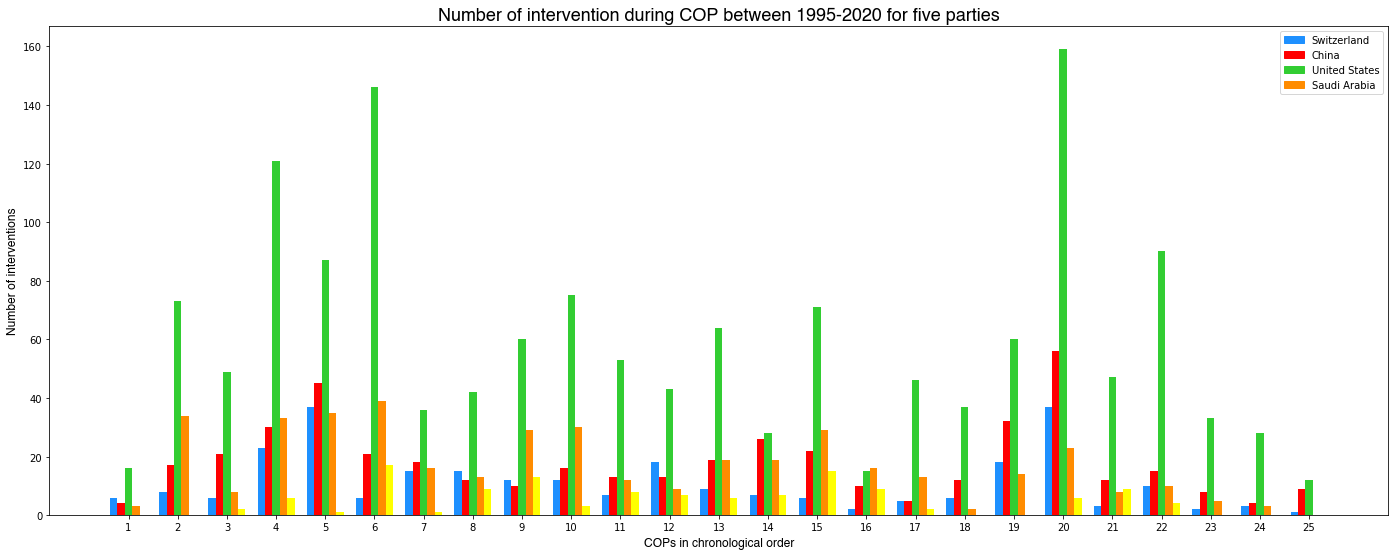

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

index = 1+np.arange(len(united_states))
#df = pd.DataFrame({'Switzerland': switzerland,'China': china, 'US': united_states, 'Saudi Arabia': saudi_arabia}, index=index)

#ax = df.plot(figsize=(25,9),kind='bar',title='Number of intervention of four parties between 1995-2020 during COP')


#plt.title('Coefficient of correlation between the two dataset for each document',**csfont)

#ax.set_xlabel("COPs in chronological order")
#ax.set_ylabel("Number of interventions")

figsize = (24,9)

fig, ax = plt.subplots(1, 1, figsize=figsize)

csfont = {'fontname':'Helvetica','fontsize':'18' }
hfont = {'fontname':'Helvetica','fontsize':'12'}

plt.title('Number of intervention during COP between 1995-2020 for five parties',**csfont)
plt.xlabel("COPs in chronological order", **hfont)
plt.ylabel("Number of interventions", **hfont)

x = index
red_patch = mpatches.Patch(color='limegreen', label='United States')
c_patch = mpatches.Patch(color='red', label='China')
b_patch = mpatches.Patch(color='dodgerblue', label='Switzerland')
a_patch = mpatches.Patch(color='darkorange', label='Saudi Arabia')
t_patch = mpatches.Patch(color='yellow', label='Tuvalu')
plt.legend(handles=[b_patch,c_patch,red_patch, a_patch])
ax.bar(x-0.3, switzerland, width=0.15, color='dodgerblue', align='center')
ax.bar(x-0.15, china, width=0.15, color='red', align='center')
ax.bar(x+0.0, united_states, width=0.15, color='limegreen', align='center')
ax.bar(x+0.15, saudi_arabia, width=0.15, color='darkorange', align='center')
ax.bar(x+0.3, tuvalu, width=0.15, color='yellow', align='center')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))


plt.show()